# 2019-yil uchun "Badamdar" supermarketidagi savdo holati

In [90]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [91]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Badamdar.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,CICEK 6ADET GUCLU OVMA PEDI,"Yuvish vositalari, tozalagichlar",2.92,2019-03-19,True
1,BAXCASARAY 0.75LT CABERNET MERLOT CAXIR,Vinolar,3.05,2019-03-19,True
2,RUSSKIY SOK.100GR SOKOLAD ELITNIY QORKIY PLITKA,Shirinliklar,1.85,2019-03-19,True
3,KARAMEL KRAS.OKT.ALENKA KG,Shirinliklar,5.25,2019-03-19,True
4,MASTER DAK 10GR PEREC CERNIY MOLOTIY POSET,Ziravorlar,0.20,2019-09-29,False
5,CER.IYDE KG,Quruq mevalar,6.60,2019-09-29,False
6,JAN 40ED.BIRDEFELIK KOKTEYL CUBUGU,Idish-tovoq,0.92,2019-09-29,False
7,FLORA SABUN-SUNGER QABI F338,"Yuvish vositalari, tozalagichlar",5.45,2019-09-29,False
8,SPRITE 300ML PL.Q,Gazli ichimliklar,0.39,2019-09-29,False
9,BAHAR 1LT M.SIRESI ALBALI S/Q,Mevali sharbatlar,1.58,2019-09-29,False


In [92]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20933 entries, 0 to 20932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20933 non-null  object 
 1   mahsulot_turi   20933 non-null  object 
 2   mahsulot_narhi  20933 non-null  float64
 3   sotilgan_vaqti  20933 non-null  object 
 4   bonus_karta     20933 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 674.7+ KB


In [93]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [94]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20933 entries, 0 to 20932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20933 non-null  object        
 1   mahsulot_turi   20933 non-null  object        
 2   mahsulot_narhi  20933 non-null  float64       
 3   sotilgan_vaqti  20933 non-null  datetime64[ns]
 4   bonus_karta     20933 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 674.7+ KB


In [95]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2068
1804
2311
2103
2048
2091
2176
1968
2146
2203
15
0


In [96]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2068
1804
2311
2103
2048
2091
2176
1968
2146
2203
0
0


In [97]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,CICEK 6ADET GUCLU OVMA PEDI,"Yuvish vositalari, tozalagichlar",2.92,2019-03-19,True
1,BAXCASARAY 0.75LT CABERNET MERLOT CAXIR,Vinolar,3.05,2019-03-19,True
2,RUSSKIY SOK.100GR SOKOLAD ELITNIY QORKIY PLITKA,Shirinliklar,1.85,2019-03-19,True
3,KARAMEL KRAS.OKT.ALENKA KG,Shirinliklar,5.25,2019-03-19,True
4,MASTER DAK 10GR PEREC CERNIY MOLOTIY POSET,Ziravorlar,0.20,2019-09-29,False
...,...,...,...,...,...
20928,INCI 30GR SUSAM POSET,Ziravorlar,1.05,2019-06-26,True
20929,BOLLUQ 1.7KG ROYAL KELLE QEND PAKET,Shirinliklar,3.15,2019-06-26,True
20930,MISTER CORN 300GR SIRIN QARGIDALI CUBUQLARI,Shirinliklar,1.10,2019-06-26,True
20931,DOGADAN 20X2GR FORM CAY MISIR PUSKULLU,Choy,3.50,2019-06-26,True


In [98]:
#9 2019-yilda "Badamdar" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4787
Maishiy buyumlar,1122
"Yuvish vositalari, tozalagichlar",1066
Mevali sharbatlar,976
Idish-tovoq,794
...,...
Kefir,21
Tayyor ovqatlar,14
Shampan,9
Muzlatilgan mahsulotlar,8


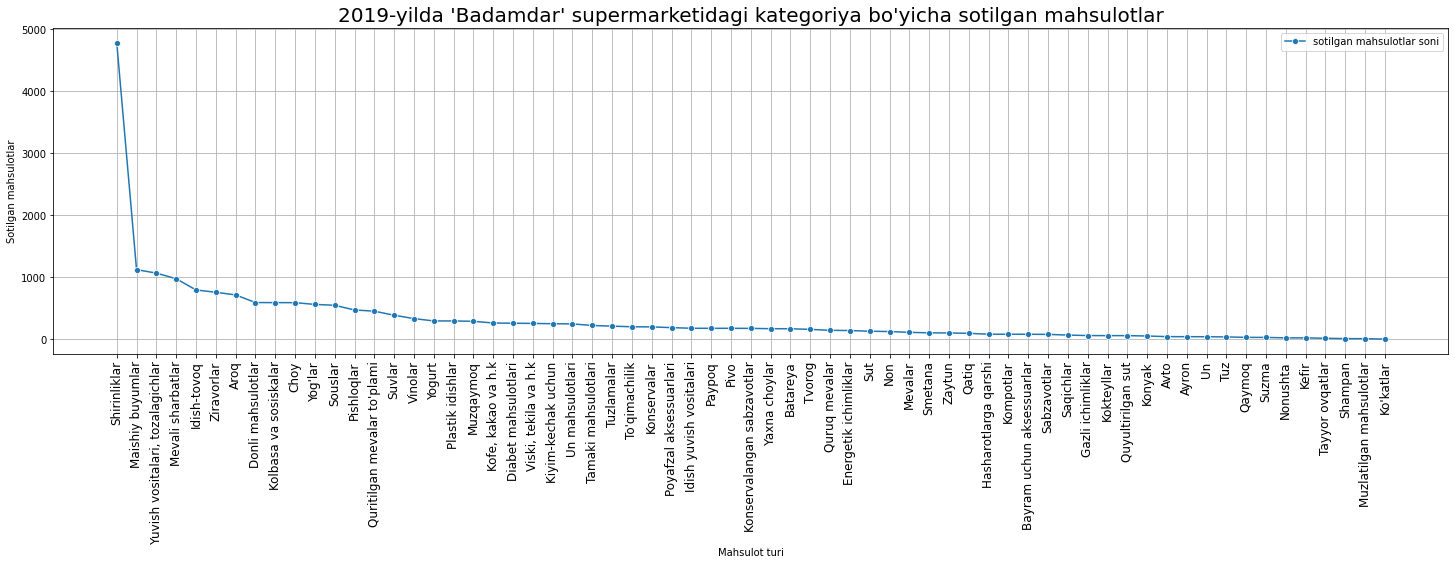

In [99]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Badamdar' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [100]:
#10 2019-yilda "Badamdar" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10208.92
Avto,246.69
Ayron,31.48
Batareya,767.01
Bayram uchun aksessuarlar,212.61
...,...
Yog'lar,5074.92
Yogurt,368.87


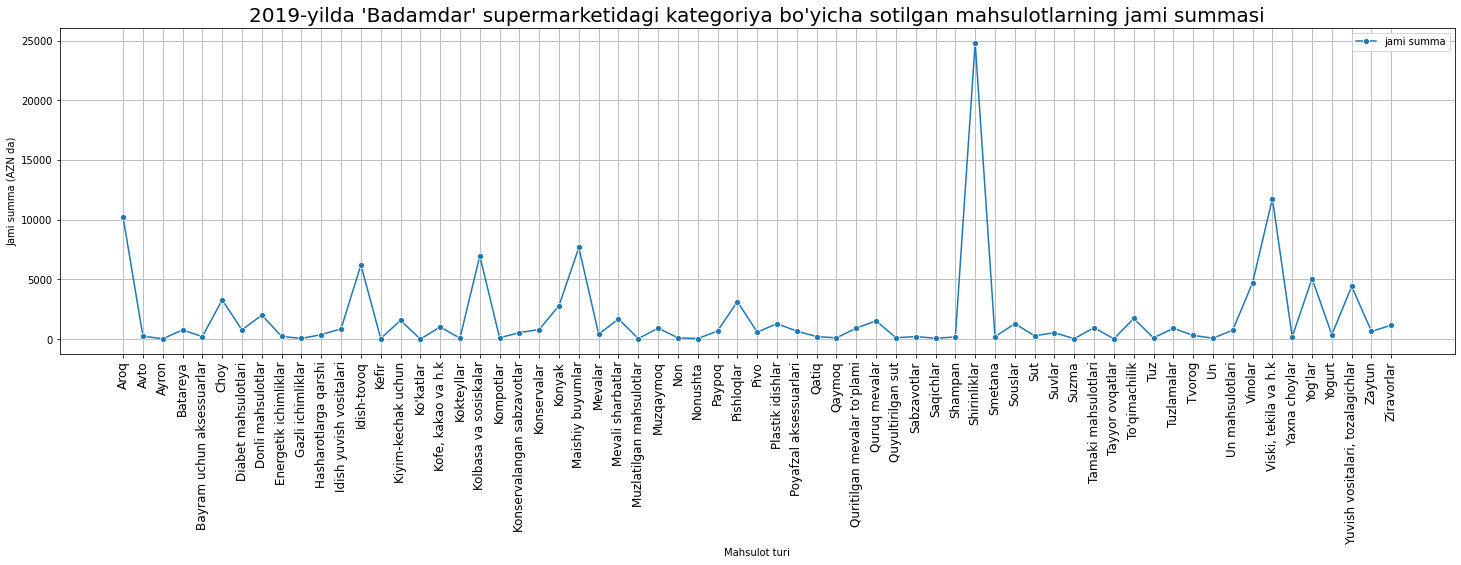

In [101]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Badamdar' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [102]:
#11 2019-yilda "Badamdar" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10527,10391


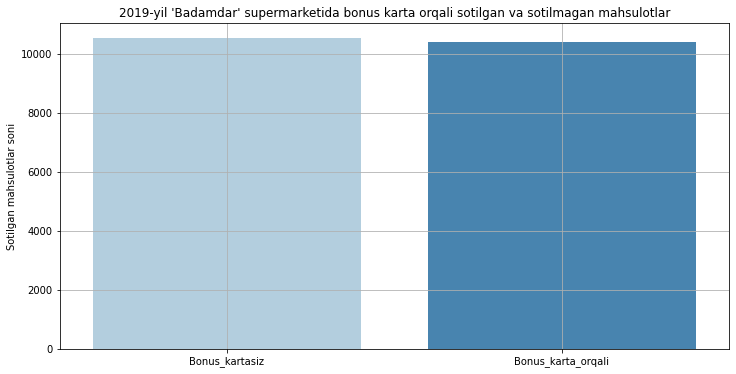

In [103]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Badamdar' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [104]:
#12 2019-yilda "Badamdar" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2068
Fevral,1804
Mart,2311
Aprel,2103
May,2048
Iyun,2091
Iyul,2176
Avgust,1968
Sentabr,2146
Oktabr,2203


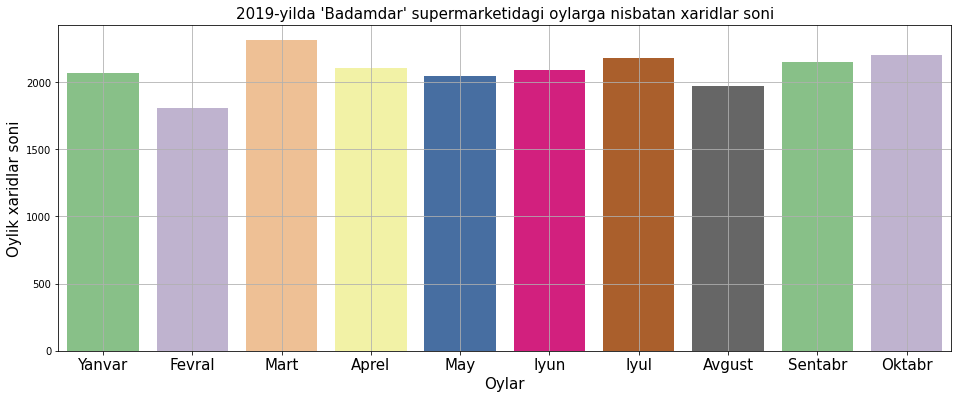

In [105]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Badamdar' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [106]:
#13 2019-yilda "Badamdar" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3055
Seshanba,2778
Chorshanba,3204
Payshanba,3140
Juma,2915
Shanba,2813
Yakshanba,3013


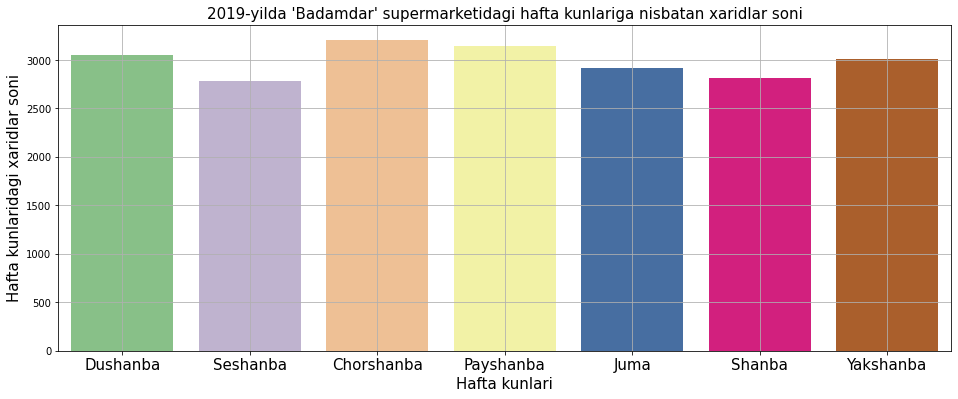

In [107]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Badamdar' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [108]:
#14 2019-yilda "Badamdar" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,629
2,672
3,719
4,602
5,593
6,682
7,703
8,630
9,738
10,754


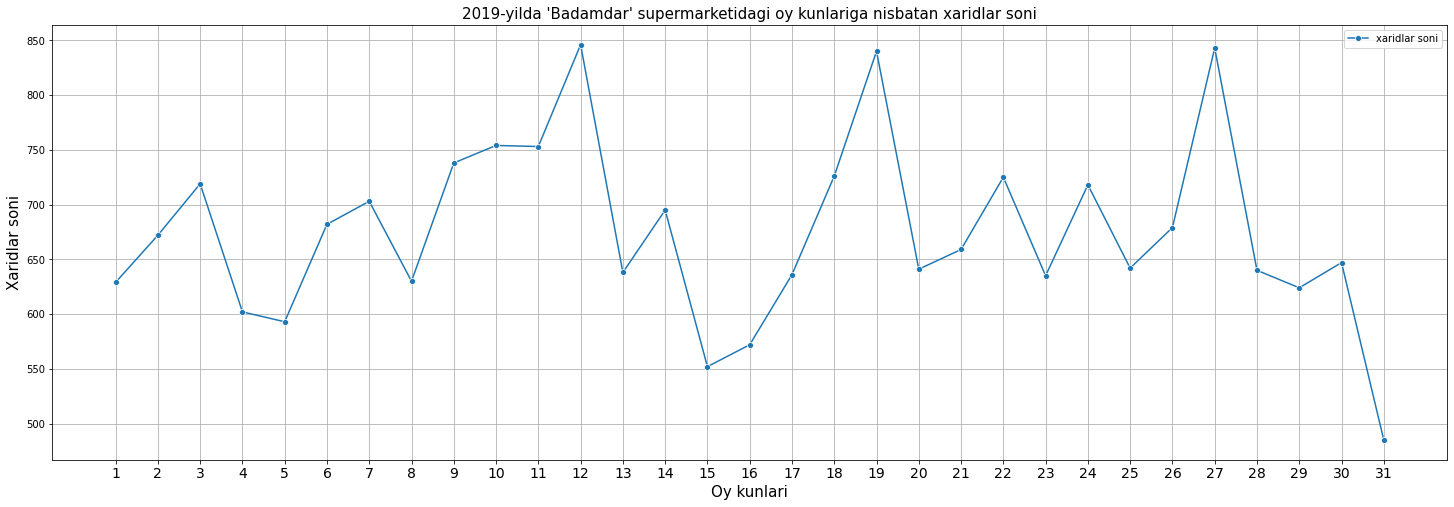

In [110]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Badamdar' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [111]:
#15 2019-yil 'Badamdar' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [112]:
len(oy_sanalari)

310

In [113]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [114]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [115]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,68,58,103,43,79,57,72,49,88,48,65,54,47,80,59,60,102,50,85,92,62,78,65,74,29,52,67,61,63,86,72
Fevral,40,101,69,43,51,61,57,58,91,99,53,71,67,53,27,49,40,97,38,62,63,48,81,73,67,67,98,80,0,0,0
Mart,53,42,64,81,45,95,55,52,59,92,62,62,103,53,129,43,49,65,104,118,82,80,62,89,64,80,120,78,82,35,113
Aprel,45,63,95,64,69,67,71,64,58,81,102,123,71,65,44,64,65,61,117,21,76,73,44,51,80,56,91,82,77,63,0
May,61,39,60,102,36,78,87,39,100,75,58,112,69,107,48,48,46,75,68,11,87,73,59,76,64,59,76,24,89,74,48
Iyun,57,85,91,25,50,57,56,86,77,119,62,56,53,106,55,60,90,58,82,69,44,62,68,73,71,85,79,68,57,90,0
Iyul,83,62,58,90,59,90,64,72,48,66,61,93,29,88,81,57,57,123,86,82,68,99,56,48,56,63,81,85,52,62,57
Avgust,35,86,58,35,80,49,79,104,49,35,73,110,93,56,33,56,64,54,75,61,30,37,68,62,66,78,54,52,66,76,94
Sentabr,102,45,69,69,102,58,73,61,59,71,130,85,76,41,47,81,50,72,90,91,74,83,73,63,77,50,78,45,54,77,0
Oktabr,85,91,52,50,22,70,89,45,109,68,87,80,30,46,29,54,73,71,95,34,73,92,59,109,68,89,99,65,84,84,101


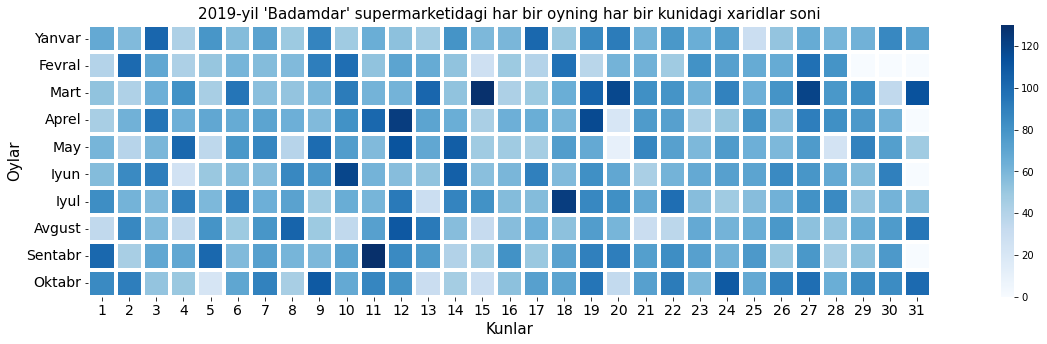

In [116]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Badamdar' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

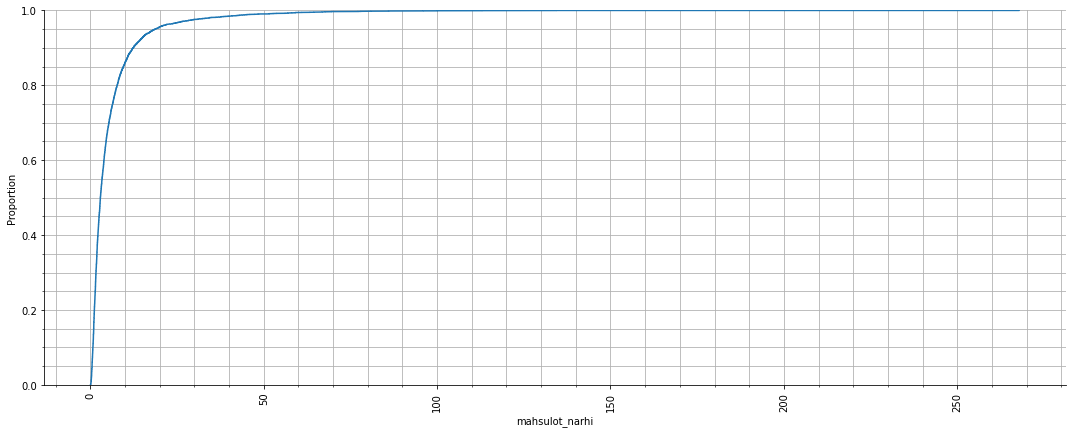

In [117]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()